In [1]:
from run_models import *

In [2]:
# if you don't have any data yet, you can uncomment the last line and launch it. 
# but it is better to execute the code directly with "python run_models launch" to avoid filling up the notebook
# don't forget your GPU

#do_training_WE_FED_LOCAL

In [3]:
# Distributions used
for key, value in distributions.items():
    print(key, ' : ', value)

A  :  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
B  :  [0, 0, 0, 0, 0.2, 0.6, 0.2, 0, 0, 0]
C  :  [0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0]
D  :  [0, 0, 0, 0.4, 0.1, 0, 0.1, 0.4, 0, 0]
E  :  [0, 0, 0, 0.1, 0.2, 0.4, 0.2, 0.1, 0, 0]
F  :  [0, 0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0]
G  :  [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


## Benchmark Section

In [5]:
pickles_folder = "./generated/pickles/"

def display_benchmark_best_accuracy_restults(distributions, nb_agents):
     for d_name in distributions.keys():
        print(f'#==== Results for Distribution {d_name} ====#\n')
        for n in nb_agents:
            with open(pickles_folder+str(n)+"-"+d_name+".pickle", 'rb') as f:
                d = pickle.load(f)
            print(f'Test accuracy results for distribution {d_name} with {n} agents\n')
            print(f' - Weight Erosion    : accuracy is {d[0][0]:.4f} achieved at round {d[0][1]} \n')
            print(f' - Federated Average : accuracy is {d[1][0]:.4f} achieved at round {d[1][1]} \n')
            print(f' - Local Training    : accuracy is {d[2][0]:.4f} achieved at round {d[2][1]} \n')
                 
display_benchmark_best_accuracy_restults(distributions, clients)

#==== Results for Distribution A ====#

Test accuracy results for distribution A with 10 agents

 - Weight Erosion    : accuracy is 0.9880 achieved at round 16 

 - Federated Average : accuracy is 0.9920 achieved at round 22 

 - Local Training    : accuracy is 0.9719 achieved at round 14 

Test accuracy results for distribution A with 20 agents

 - Weight Erosion    : accuracy is 0.9849 achieved at round 14 

 - Federated Average : accuracy is 0.9880 achieved at round 27 

 - Local Training    : accuracy is 0.9508 achieved at round 14 

Test accuracy results for distribution A with 50 agents

 - Weight Erosion    : accuracy is 0.9759 achieved at round 19 

 - Federated Average : accuracy is 0.9799 achieved at round 29 

 - Local Training    : accuracy is 0.9167 achieved at round 14 

Test accuracy results for distribution A with 100 agents

 - Weight Erosion    : accuracy is 0.9598 achieved at round 19 

 - Federated Average : accuracy is 0.9739 achieved at round 30 

 - Local Trainin

## Plot Section

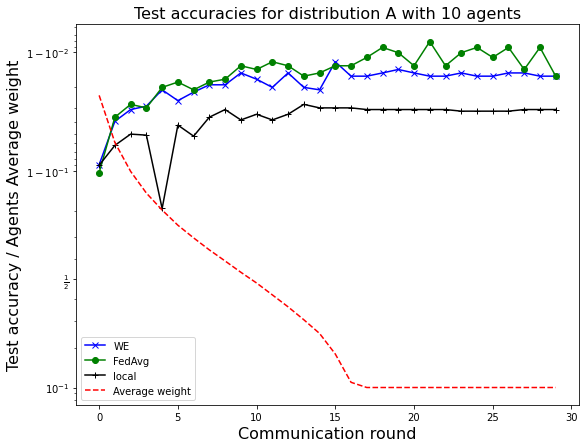

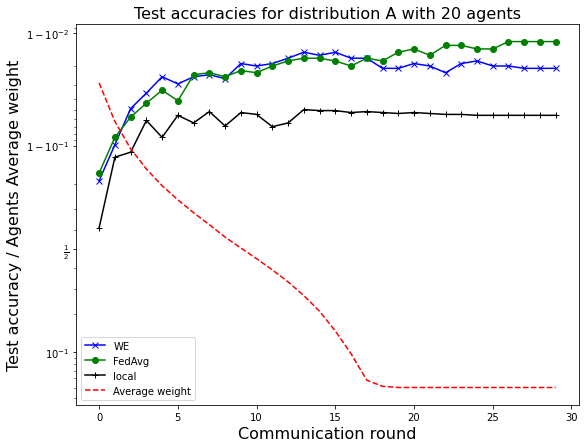

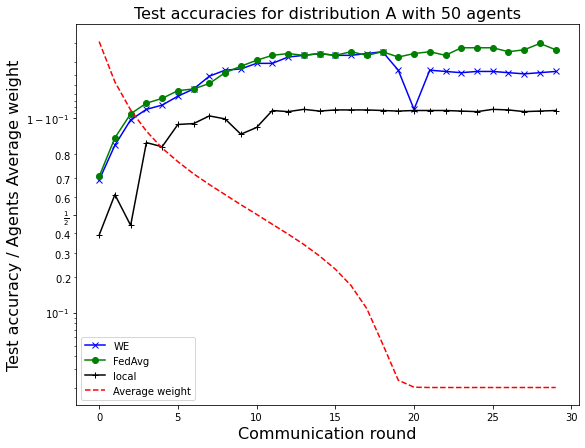

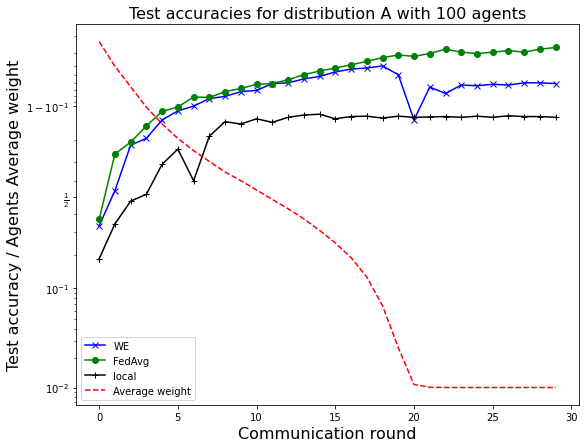

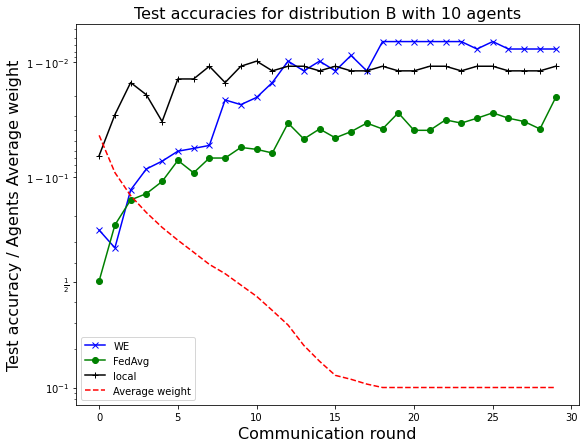

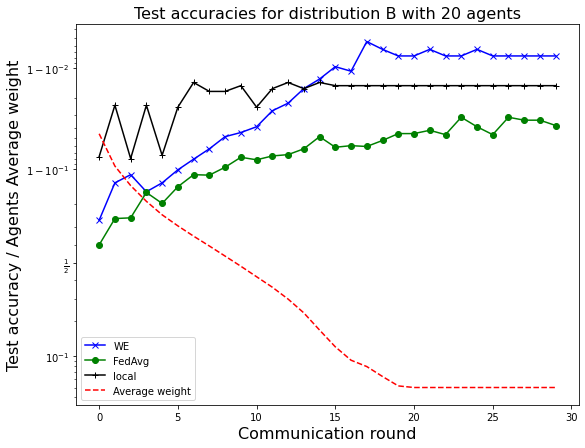

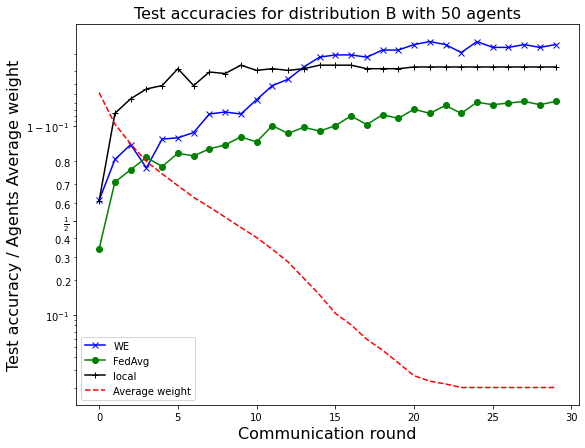

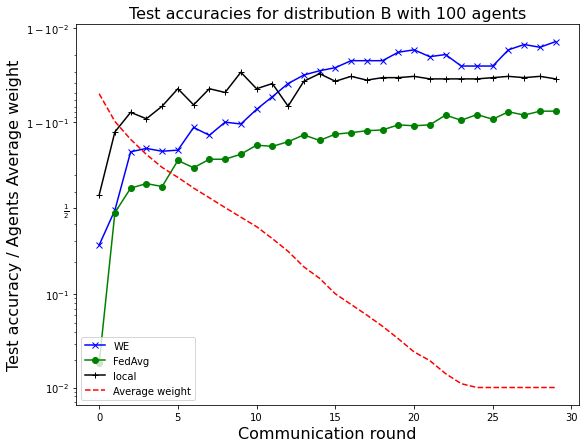

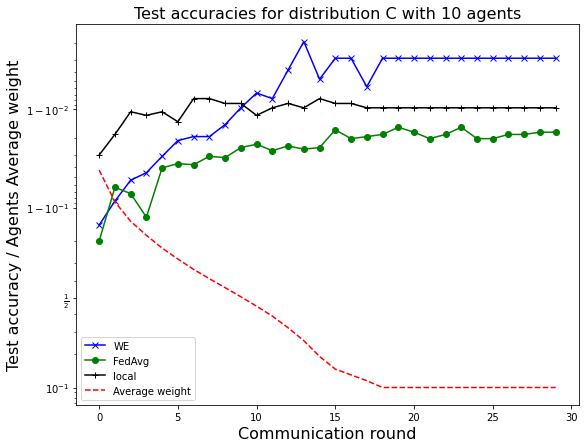

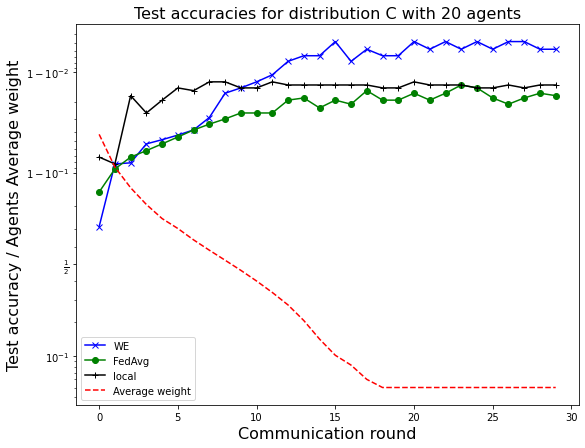

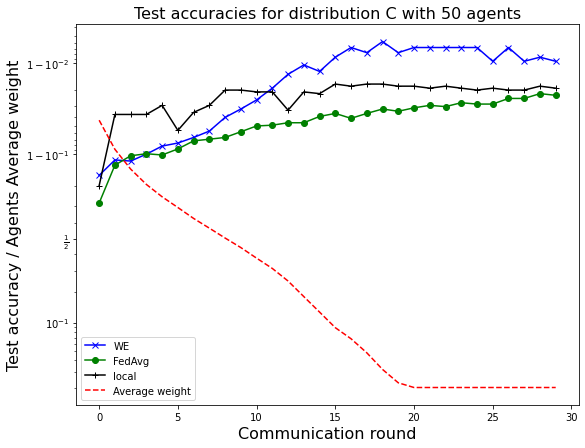

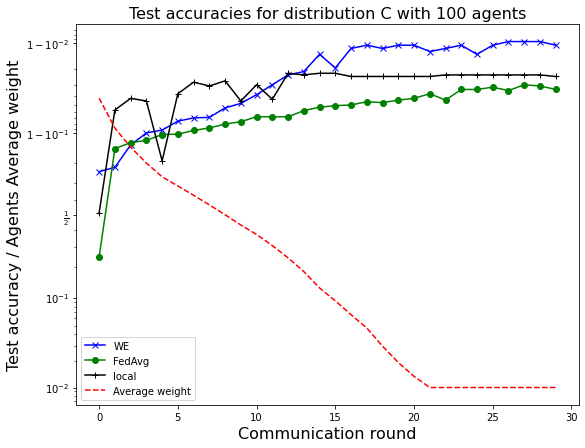

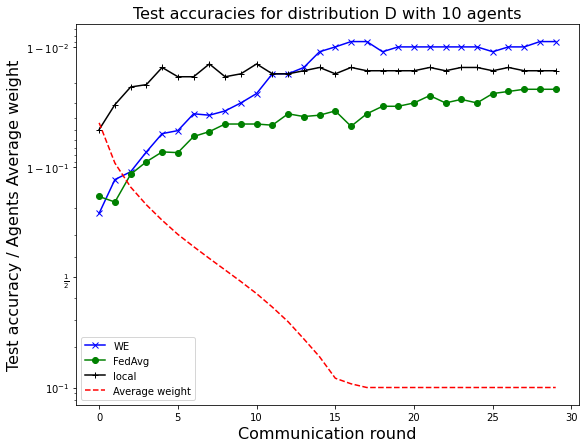

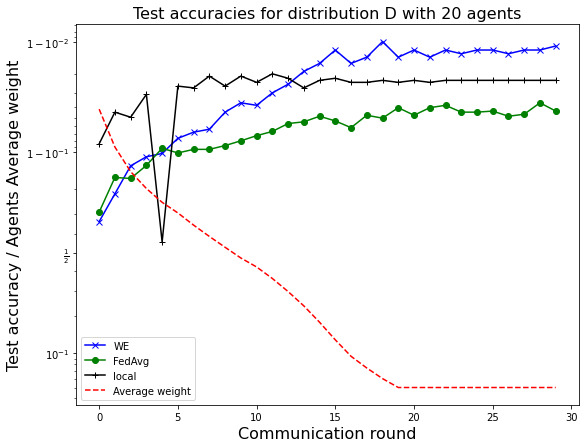

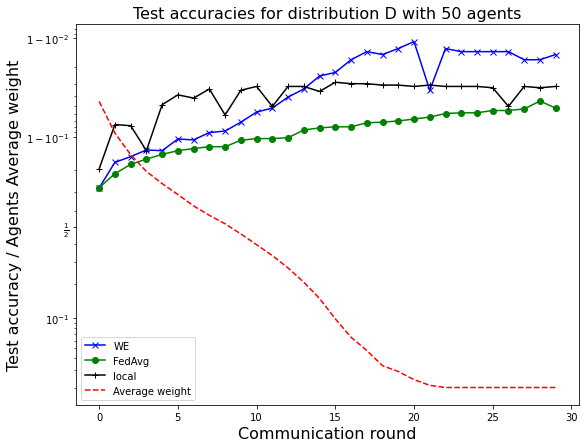

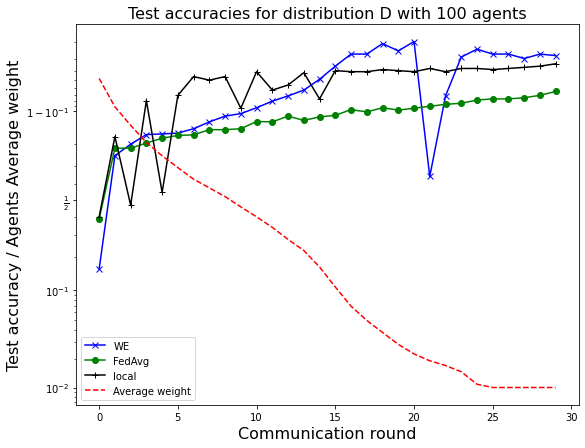

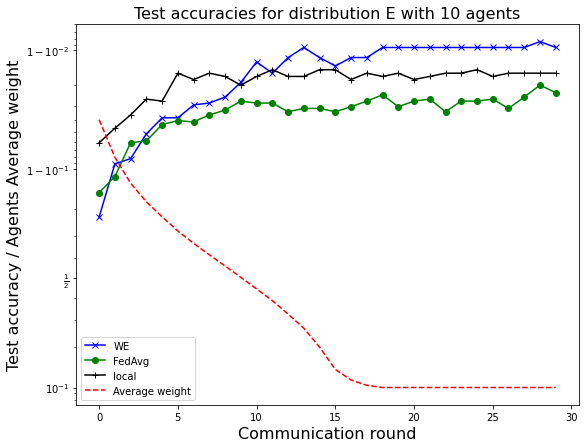

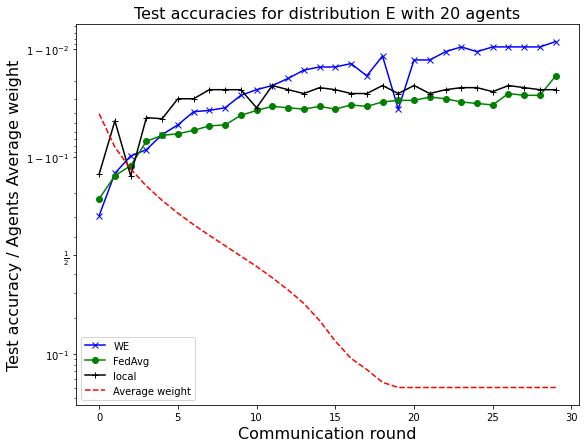

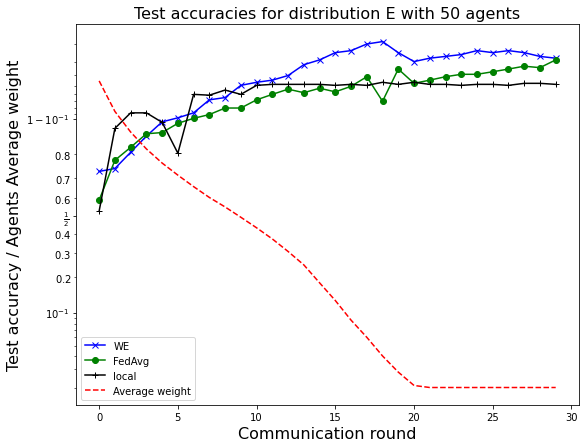

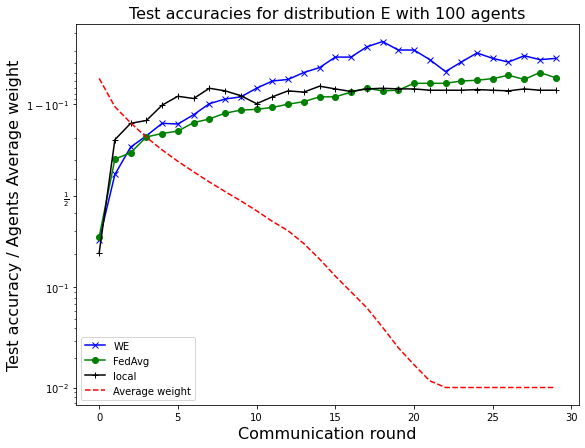

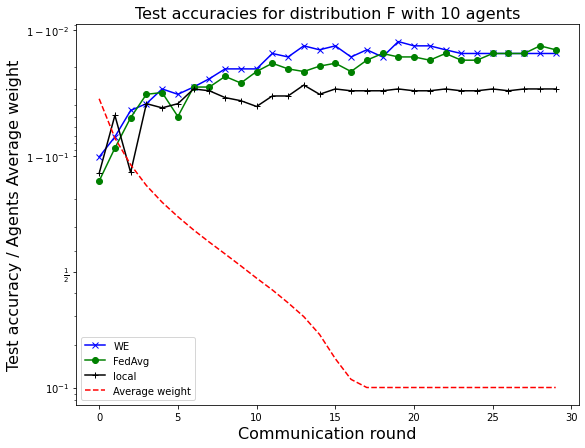

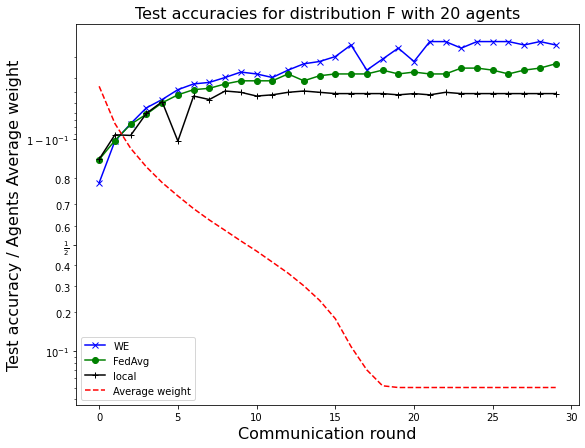

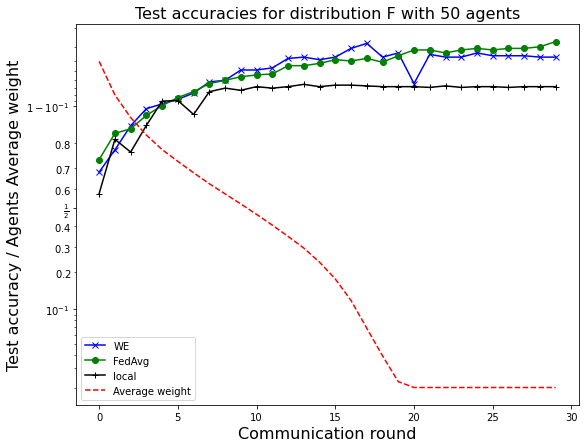

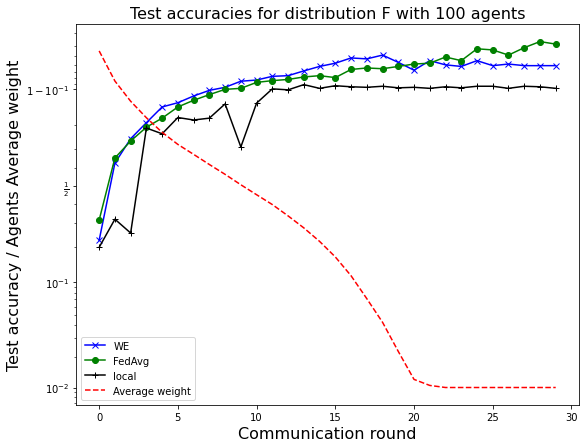

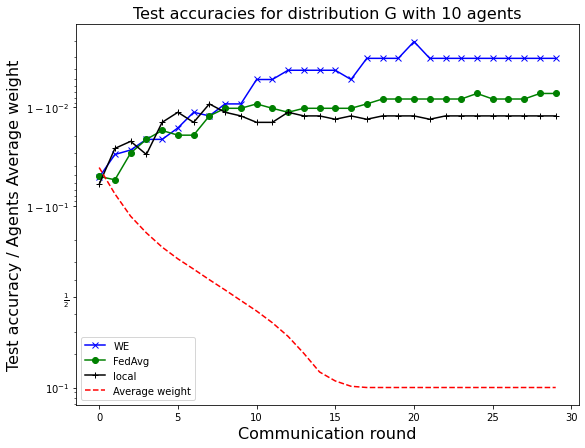

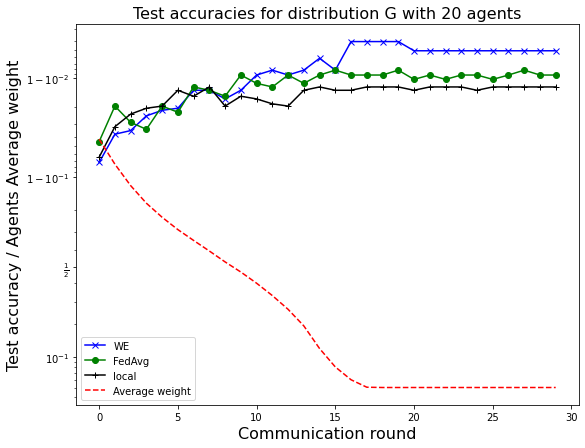

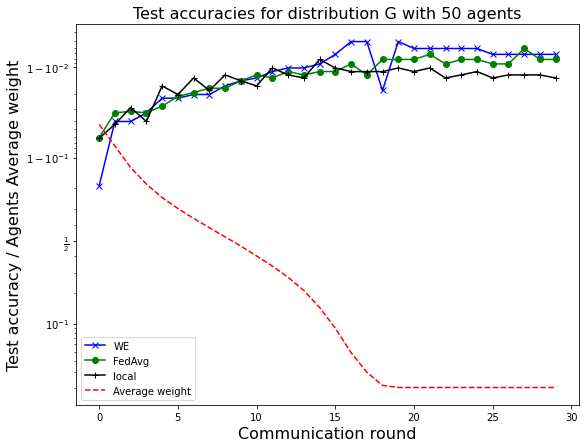

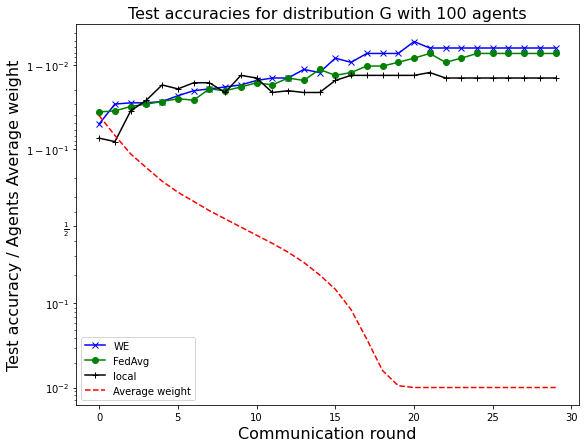

In [4]:
import matplotlib.pyplot as plt

# Plots accuracy for each algorithms for w.r.t. the number of rounds
def plot(nb_round, WE_result, FedAvg_result, local_result, weight_avg, title, file_name):
#def plot(nb_round, WE_result, weight_avg, title, file_name):
    plt.figure(num=None, figsize=(9, 7), facecolor='w', edgecolor='k')
    plt.plot(nb_round, WE_result, '-xb', label='WE')
    plt.plot(nb_round, FedAvg_result, '-og', label="FedAvg")
    plt.plot(nb_round, local_result, '-+k', label="local")
    plt.plot(nb_round, weight_avg, color='r', linestyle='dashed', label='Average weight')
    plt.title(title, fontsize=16)
    ax = plt.gca()
    ax.legend(loc=3)
    ax.set_xlabel("Communication round", fontsize=16)
    ax.set_ylabel("Test accuracy / Agents Average weight", fontsize=16)
    ax.set_yscale('logit')   #maybe use it to see clearly performance

    results_dir = './generated/plots/'
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)

    plt.savefig(results_dir+file_name+".png")
    plt.show()

def format_for_plot(data, index=0):
    return np.array([d[index] for d in data])

pickles_folder = "./generated/pickles/"

def plot_pickled_results(distributions, nb_agents):
    for d_name in distributions.keys():
        for n in nb_agents:
            with open(pickles_folder+"federated_"+str(n)+"-"+str(d_name)+".pickle", 'rb') as f:
                data_fed = pickle.load(f)
            with open(pickles_folder+"weight_erosion_"+str(n)+"-"+str(d_name)+".pickle", 'rb') as f:
                data_we = pickle.load(f)
            with open(pickles_folder+"local_"+str(n)+"-"+str(d_name)+".pickle", 'rb') as f:
                data_local = pickle.load(f)

            nb_round = np.arange(30)
            
            acc_fed_plot = format_for_plot(data_fed)
            acc_we_plot = format_for_plot(data_we)
            weight_avg = format_for_plot(data_we, 3)
            acc_loc_plot = format_for_plot(data_local)


            plot(nb_round=nb_round, WE_result=acc_we_plot, FedAvg_result=acc_fed_plot, local_result=acc_loc_plot,
                 weight_avg=weight_avg, title=f'Test accuracies for distribution {d_name} with {n} agents',
                 file_name=f'results_distribution_{d_name}_{n}_agents')

clients = [10, 20, 50, 100]
plot_pickled_results(distributions, clients)

In [2]:
# Distributions digits used
for key, value in distributions_sizePenalty.items():
    print(key, ' : ', value)

A  :  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
C  :  [0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0]


In [3]:
# Distributions sized used
for key, value in distributions_size_in_sizePenalty.items():
    print(key, ' : ', value)

A  :  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
B  :  [0.21, 0.06, 0.11, 0.06, 0.11, 0.06, 0.16, 0.06, 0.11, 0.06]
C  :  [0.1, 0.1, 0.1, 0.1, 0.2, 0.05, 0.05, 0.1, 0.1, 0.1]


In [7]:
# size penalty used
for size_penalty in list_size_penalty:
    print(size_penalty)

0
2


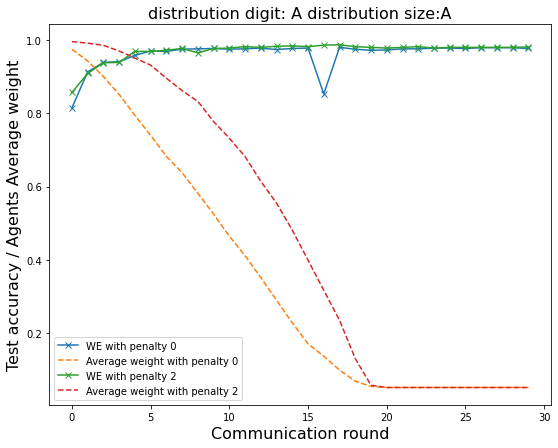

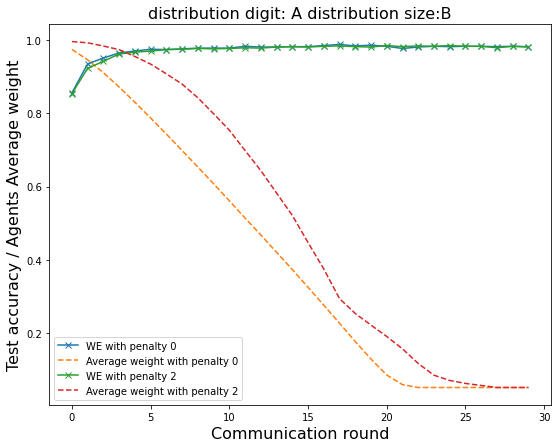

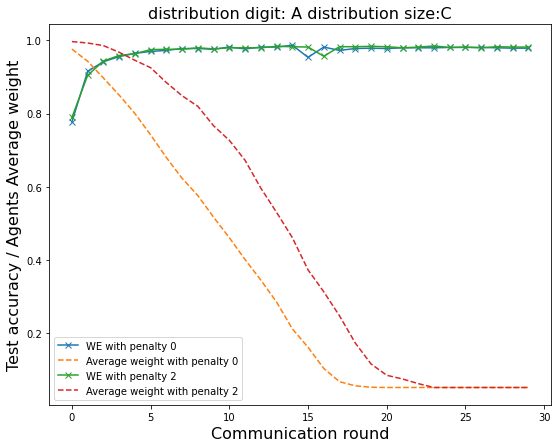

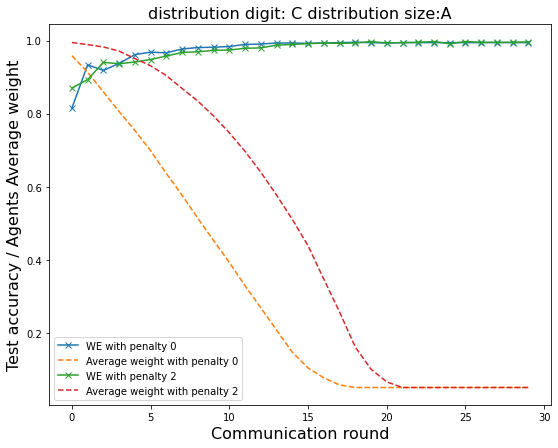

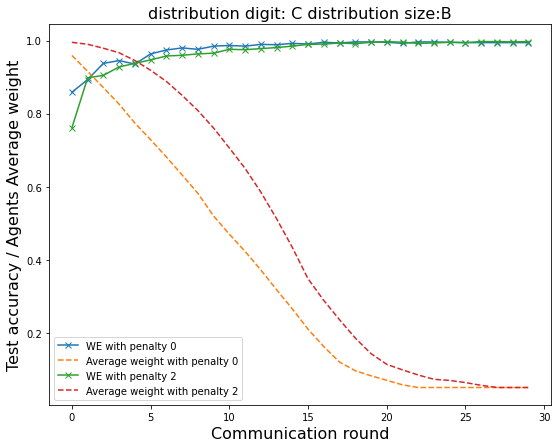

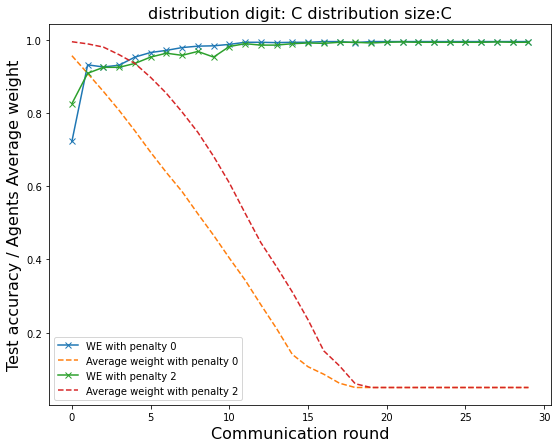

In [6]:
import matplotlib.pyplot as plt

def format_for_plot(data, index=0):
    return np.array([d[index] for d in data])

nb_round = np.arange(30)

for name, distribution in distributions_sizePenalty.items():        
        for name_size, distribution_size in distributions_size_in_sizePenalty.items():
            
            plt.figure(num=None, figsize=(9, 7), facecolor='w', edgecolor='k')
            
            for size_penalty in list_size_penalty:
                
                with open("./generated/pickles/weight_erosion_20-"+name+"-"+name_size+"-"+str(size_penalty)+".pickle", 'rb') as f:
                    data = pickle.load(f)
                    
                acc_we_plot = format_for_plot(data)
                weight_avg = format_for_plot(data, 3)
                
                plt.plot(nb_round, acc_we_plot, '-x', label='WE with penalty '+str(size_penalty))
                plt.plot(nb_round, weight_avg, linestyle='dashed', label='Average weight with penalty '+str(size_penalty))
                
            title = "distribution digit: "+name+" distribution size:"+name_size
            plt.title(title, fontsize=16)
            ax = plt.gca()
            ax.legend(loc=3)
            ax.set_xlabel("Communication round", fontsize=16)
            ax.set_ylabel("Test accuracy / Agents Average weight", fontsize=16)
            #ax.set_yscale('logit')
            plt.show()
            